Part1

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6,4]
np.random.seed(42)

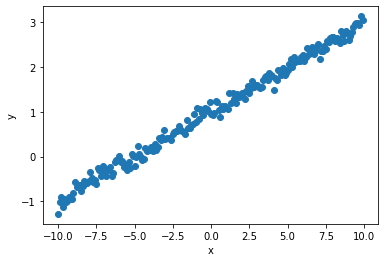

In [271]:
a, b = 0.2 , 1
x = np.arange(-10,10,0.1)
y = a*x + b + np.random.normal(0, 0.1 , len(x))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [276]:

def predict(X, theta, b):
    return np.dot(theta, X) + b

#cost function
def computeCost(X, Y, P):
    return np.sum((P-Y)**2)/(2*len(X))

#backward propogation
def backward(X,Y,P):
    dt = np.dot(X,(P-Y).T)/len(X)
    db = np.sum(P-Y)/len(X)
    return dt,db

def propagate(theta, b, X, Y):
    P = predict(X,theta,b)
    cost = computeCost(X,Y,P) 

    dt,db = backward(X,Y,P)
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

def optimize(theta, b, X, Y, num_iterations, learning_rate):
    for i in range(num_iterations):
        grads, cost = propagate(theta, b, X, Y)
        dt = grads["dt"]
        db = grads["db"]
        theta = theta-learning_rate*dt
        b = b-learning_rate*db
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads

def forward(X,Y,num_iterations = 500, learning_rate= 0.01):
    theta, b = 1,1

    parameters, _ = optimize(theta, b, X, Y, num_iterations, learning_rate)
    
    theta = parameters["theta"]
    b = parameters["b"]
    
    prediction = predict(X, theta, b)
    return prediction,parameters




In [277]:
prediction,parameters = forward(x,y)

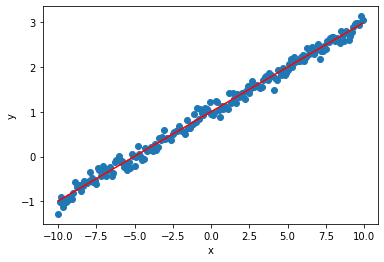

In [278]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, prediction, color='red')
plt.show()

In [279]:
print(f"original: a = {a}; b = {b}")
print(f"Predicted: a = {parameters['theta']}; b = {parameters['b']}")

original: a = 0.2; b = 1
Predicted: a = 0.1992313092397161; b = 1.0019855787703429


Part 2

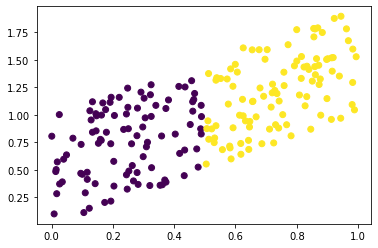

In [280]:
classes=2
size = 200
labels = np.random.randint(0, classes, size)
x = (np.random.rand(size) + labels) / classes
y = x + np.random.rand(size)
x = x.reshape(size, 1)
y = y.reshape(size, 1)
labels = labels.reshape(size, 1)
x = np.hstack((x, y)).squeeze().T
y = labels.T
plt.scatter(x[0,:],x[1,:], c=y)

In [281]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def predict(X, theta, b):
    return sigmoid((theta.T @ X) + b)

#cost function
def computeCost(X, Y, P):
    cost = -np.sum(Y*np.log(P)+(1-Y)*np.log(1-P))/ X.shape[1]
    return cost.squeeze()

#backward propogation
def backward(X,Y,P):
    dt = (X @ (P-Y).T)/ X.shape[1]
    db = np.sum(P-Y)/ X.shape[1]
    return dt,db

def propagate(theta, b, X, Y):
    P = predict(X,theta,b)
    cost = computeCost(X,Y,P) 

    dt,db = backward(X,Y,P)
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

def optimize(theta, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(theta, b, X, Y)
        dt = grads["dt"]
        db = grads["db"]
        theta = theta-learning_rate*dt
        b = b-learning_rate*db
        if i % 10 == 0:
            costs.append(cost)
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

def accuracy(gt,pr):
    accuracy = (gt == pr).sum() / len(gt)
    return accuracy/100

def forward(X,Y,num_iterations = 1000, learning_rate= 0.05):
    theta, b = np.zeros((X.shape[0],1)),0

    parameters, _, costs = optimize(theta, b, X, Y, num_iterations, learning_rate)
    
    theta = parameters["theta"]
    b = parameters["b"]
    prediction = predict(X, theta, b)
    prediction = (prediction > 0.5).astype(int)
    return prediction,parameters,costs

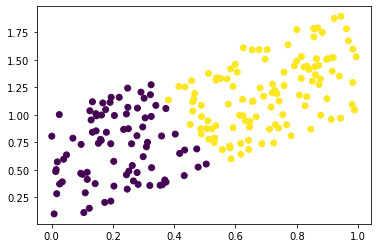

In [282]:
prediction,parameters,costs = forward(x,y)
plt.scatter(x[0,:],x[1,:], c=prediction)

getting metrics on test dataset

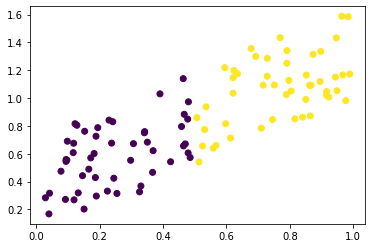

In [283]:
classes=2
size = 100
labels = np.random.randint(0, classes, size)
x = (np.random.rand(size) + labels) / classes
y = x + np.random.rand(size) * 0.7
x = x.reshape(size, 1)
y = y.reshape(size, 1)
labels = labels.reshape(size, 1)
x = np.hstack((x, y)).squeeze().T
y = labels.T
plt.scatter(x[0,:],x[1,:], c=y)

In [284]:
test_prediction = predict(x, parameters["theta"], parameters["b"])
test_prediction = (test_prediction > 0.5).astype(int)

Accuracy =  0.94


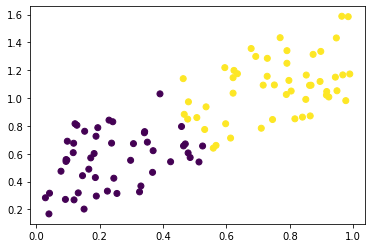

In [285]:
print("Accuracy = ",accuracy(y,test_prediction))
plt.scatter(x[0,:],x[1,:], c=test_prediction)